In [136]:
# https://datascienceplus.com/predict-customer-churn-logistic-regression-decision-tree-and-random-forest/

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


In [7]:
def churn_rate(df_col,df_churn):
    table=pd.crosstab(df_col, df_churn)
    return table.div(table.sum(1).astype(float), axis=0)[1]

def convert_categories_to_dummy(dff, cat_vars):
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(dff[var], prefix=var)
        dff1=dff.join(cat_list)
        dff=dff1
    return dff.drop(cat_vars, axis=1)

def yes_no_to_0_1(dff,cols):    
    for i in cols: 
         dff[i]=dff[i].map({'Yes': 1, 'No': 0,'No internet service':0})
    return dff

def gender_to_0_1(dff,colname):    
    dff[colname]=dff[colname].map({'Male': 1, 'Female': 0})
    return dff

def draw_conf_matrix(y_pred, y_test):
    cm= metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')


df=pd.read_csv('/home/chuck/DataScience/Churn_telecom/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col="customerID")

df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [451]:
# MANUAL FORMATTING - REMOVING/RENAMING COLUMNS
df1=df1.drop(
    [
'OnlineSecurity_No',
'OnlineSecurity_No internet service',
'OnlineBackup_No',
'OnlineBackup_No internet service',
'DeviceProtection_No',
'DeviceProtection_No internet service',
'TechSupport_No',
'TechSupport_No internet service'
]
, axis=1)


df1 = df1.rename(columns={   'OnlineSecurity_Yes':'OnlineSecurity',
'OnlineBackup_Yes':'OnlineBackup',
'DeviceProtection_Yes':'DeviceProtection',
'TechSupport_Yes':'TechSupport'
})

df1[['InternetService_No',
    'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport'
    
]].head(100)

,InternetService_No,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
customerID,,,,,
7590-VHVEG,0,0,1,0,0
5575-GNVDE,0,1,0,1,0
3668-QPYBK,0,1,1,0,0
7795-CFOCW,0,1,0,1,1
9237-HQITU,0,0,0,0,0
9305-CDSKC,0,0,0,1,0
1452-KIOVK,0,0,1,0,0
6713-OKOMC,0,1,0,0,0
7892-POOKP,0,0,0,1,1


In [452]:
# DROP LINES THAT ARE NOT NUMERIC

def test_numeric(dff):    
    for i in dff.columns:
        for j in dff[i]:
            try:
                float(j)
            except:
                print(i,j)

test_numeric(df1)
                
df1=df1.drop(df1[df1['TotalCharges']==' '].index)

TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  
TotalCharges  


In [453]:
df1.isnull().any()

gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
PhoneService                               False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                               False
Churn                                      False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
PaymentMethod_Bank transfer (automatic)    False
PaymentMethod_Credit card (automatic)      False
PaymentMethod_Electronic check             False
PaymentMethod_Mailed

In [454]:
df1=df1.drop(['TotalCharges'],axis=1)

# DATA VISUALIZATION

In [455]:
# SORT GRAPHS FROM HIGHEST CHURN TO LOWEST
d_list={}
for col_name in df1.drop(['MonthlyCharges','Churn'], axis=1).columns:
    d_list[col_name]=max(churn_rate (df1[col_name], df1['Churn']))    


ordered_col_list=pd.Series(d_list).sort_values(ascending=False).index


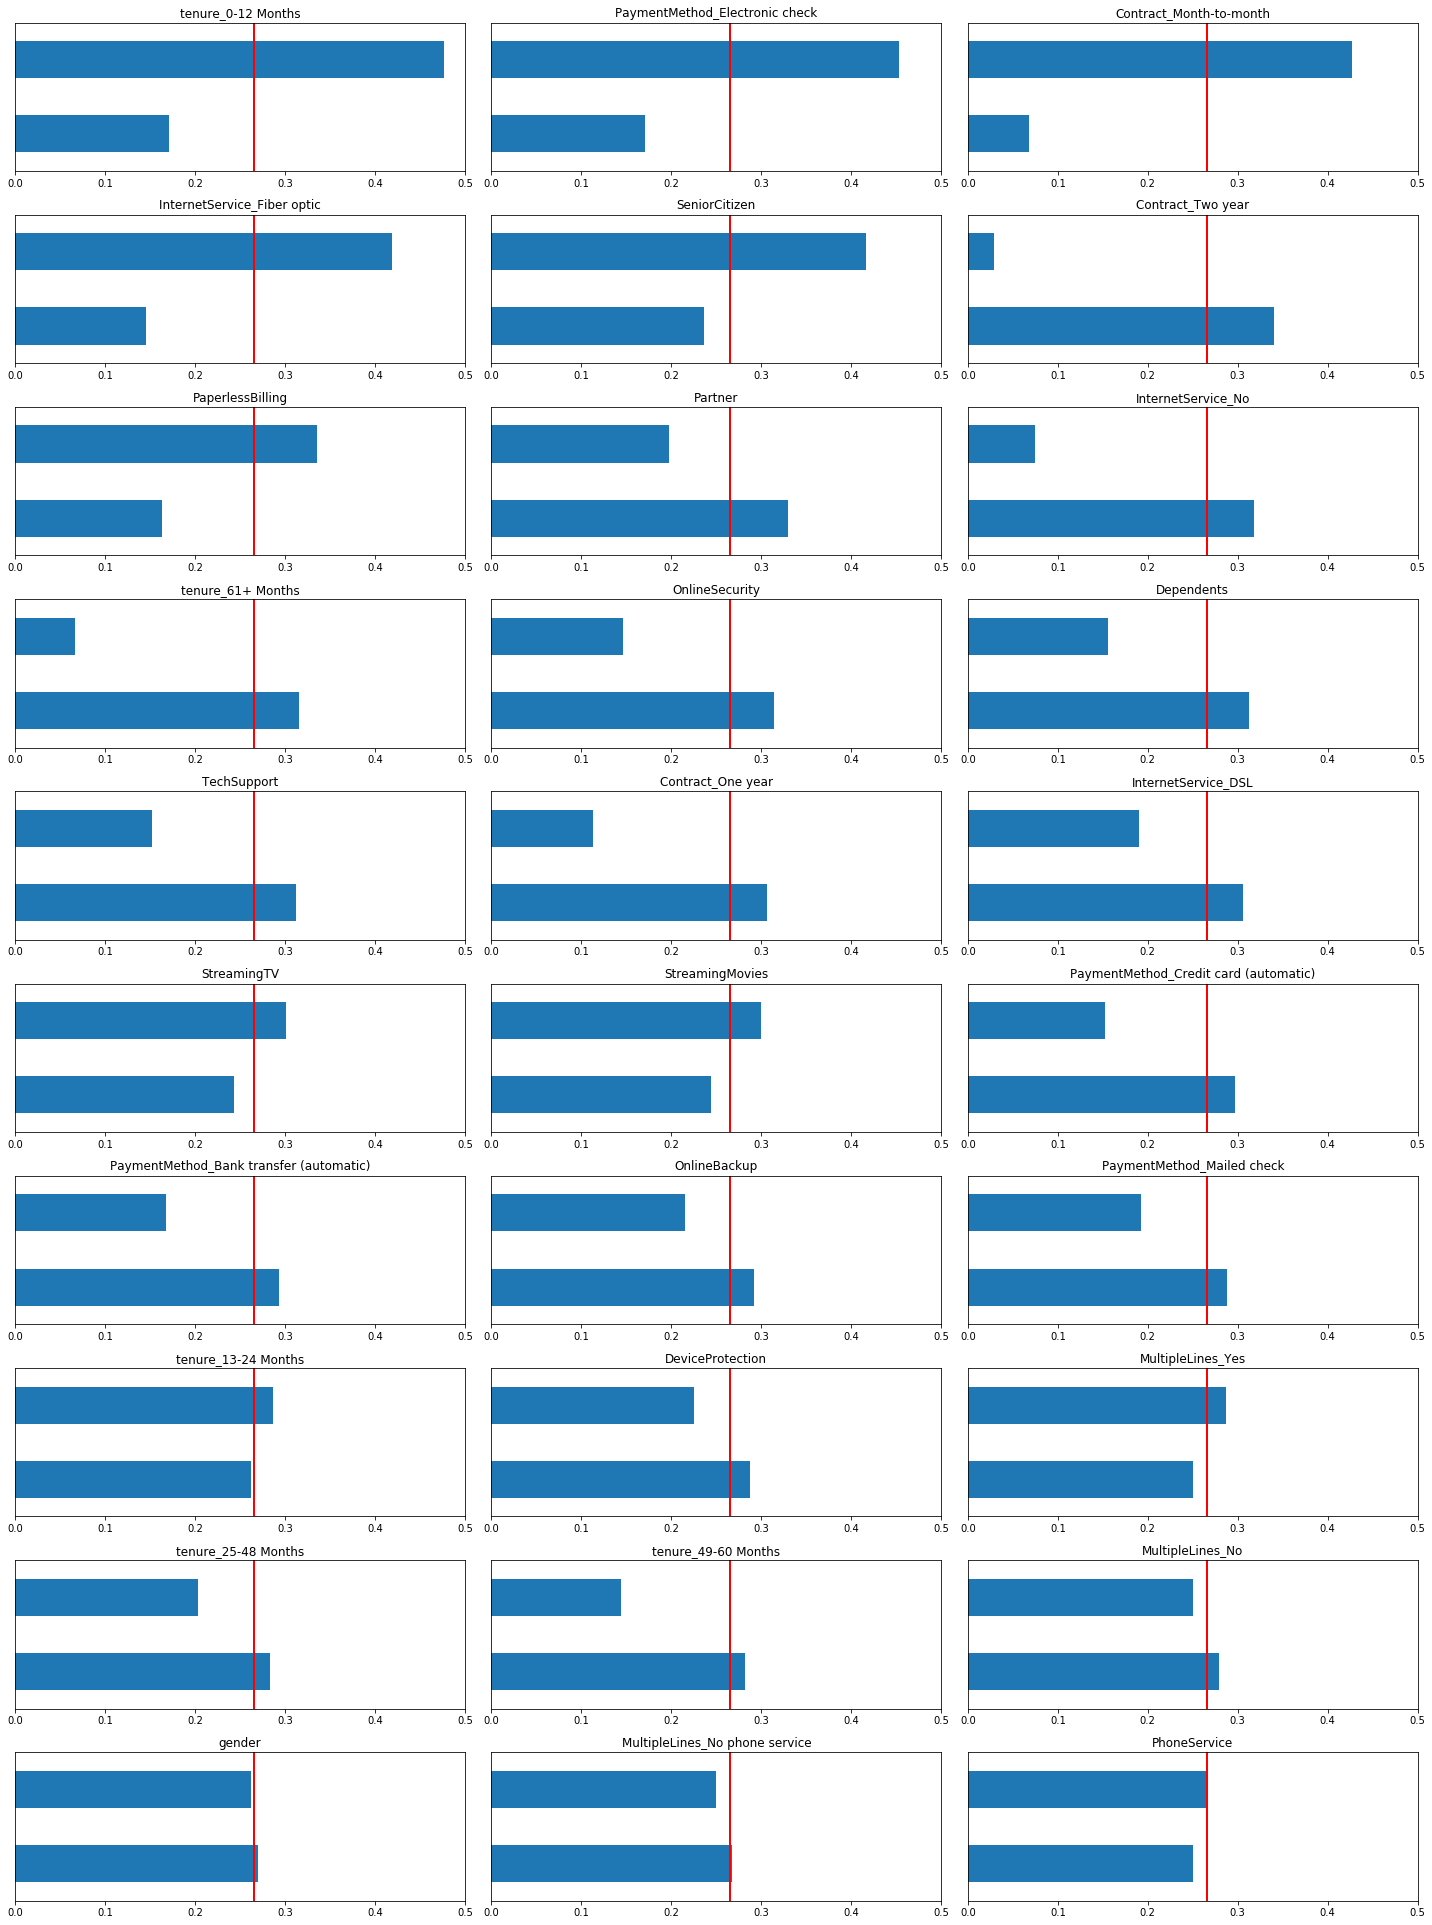

In [456]:
fig= plt.figure(figsize=(20,80))

c=1
for col_name in ordered_col_list:
    ax = fig.add_subplot(30,3,c)
    ax.set_xlim([0,0.5])
    pd.DataFrame(churn_rate(df1[col_name], df1['Churn'])).plot(kind='barh', ax=ax, legend=False,rot=30)
    plt.subplots_adjust(bottom=0.15)
    plt.title(col_name)
    ax.axes.get_yaxis().set_visible(False)
    ax.axvline(df['Churn'].sum()/df['Churn'].count(), color='red', linewidth=2)
    c=c+1
    
plt.tight_layout()


TENURE


<Figure size 432x288 with 0 Axes>

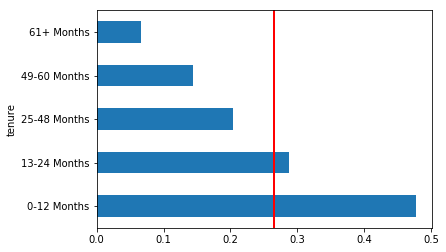

In [457]:
print("TENURE")
fig= plt.figure()
ax =pd.DataFrame(churn_rate(df['tenure'],df['Churn'])).plot(kind='barh', legend=False)
ax.axvline(df['Churn'].sum()/df['Churn'].count(), color='red', linewidth=2)

# Logistic Regression

In [477]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X=df1.drop(['Churn'],axis=1)
y=df1['Churn']

scaler = StandardScaler()
X = scaler.fit_transform(X) # THIS CAN BE USED TO IMPROVE RESULT BUT FAILS IN THIS DATA SET

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [479]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.800


In [480]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [483]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.766


In [484]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [485]:
print('SVC Accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

SVC Accuracy: 0.799


# CROSS VALIDATION

## Random Forest - K Fold

In [486]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

modelCV = RandomForestClassifier()
results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("RANDOM FOREST 10-fold cross validation average accuracy: %.3f" % (results.mean()))

modelCV = LogisticRegression()
results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("LOGISTIC REGRESSION 10-fold cross validation average accuracy: %.3f" % (results.mean()))



RANDOM FOREST 10-fold cross validation average accuracy: 0.764
LOGISTIC REGRESSION 10-fold cross validation average accuracy: 0.801


In [ ]:
df1['Churn'].value_counts()

## Random Forest - Precision and recall

             precision    recall  f1-score   support

          0       0.81      0.89      0.85      1555
          1       0.58      0.42      0.49       555

avg / total       0.75      0.77      0.75      2110



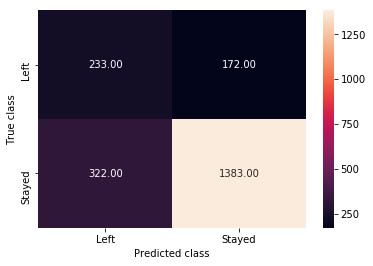

In [487]:
print(classification_report(y_test, rf.predict(X_test)))
draw_conf_matrix(rf.predict(X_test), y_test)

## Logistic Regression - Confusion Matrix

             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1555
          1       0.66      0.50      0.57       555

avg / total       0.79      0.80      0.79      2110



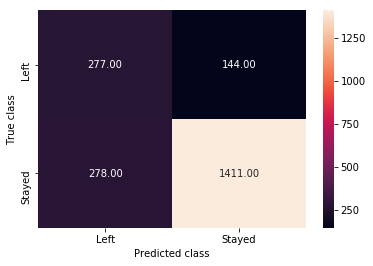

In [488]:

print(classification_report(y_test, logreg.predict(X_test)))
draw_conf_matrix(logreg.predict(X_test), y_test)

## SVC - Confusion Matrix

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1555
          1       0.66      0.47      0.55       555

avg / total       0.79      0.80      0.79      2110



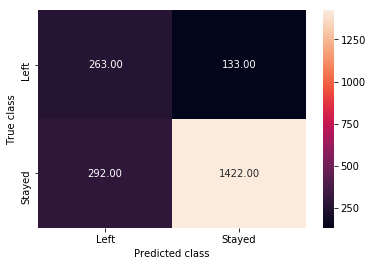

In [489]:
print(classification_report(y_test, svc.predict(X_test)))
draw_conf_matrix(svc.predict(X_test), y_test)

# ROC Curve

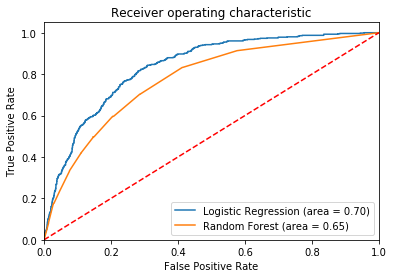

In [490]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Feature Importance for Logistic Regression

In [491]:
np.set_printoptions(suppress=True)
#np.set_printoptions(precision=5)
print(np.round(logreg.coef_, decimals=3))
print(X_train.columns)

[[ 0.012  0.129  0.02  -0.093 -0.012  0.18   0.198  0.216 -0.316 -0.08
   0.465 -0.468 -0.088  0.012  0.082 -0.018 -0.107  0.14  -0.033  0.358
  -0.022 -0.395 -0.119 -0.088  0.078 -0.131  0.484  0.043 -0.125 -0.163
  -0.335]]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [427]:
a=pd.Series(
    data= np.round(logreg.coef_, decimals=3)[0],
    index= list(X_train.columns)
)

np.absolute(a).sort_values()


TotalCharges                               0.000
MonthlyCharges                             0.010
gender                                     0.017
Partner                                    0.044
MultipleLines_Yes                          0.075
DeviceProtection                           0.109
PaymentMethod_Electronic check             0.116
tenure_49-60 Months                        0.162
Dependents                                 0.208
PaymentMethod_Bank transfer (automatic)    0.214
tenure_61+ Months                          0.215
PaymentMethod_Mailed check                 0.219
StreamingTV                                0.225
OnlineBackup                               0.246
StreamingMovies                            0.249
Contract_One year                          0.269
MultipleLines_No phone service             0.270
OnlineSecurity                             0.321
SeniorCitizen                              0.330
tenure_13-24 Months                        0.332
InternetService_DSL 

# Feature Importance for Random Forest

In [396]:
feature_labels = np.array(selected_columns)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

[ 0.99065797  2.27103902  1.03561683 -0.65230493  0.32718939  1.26552512
  1.25494263  0.82893915  1.02054117 -0.92722183 -0.72346173  1.12752731
 -0.52513044  1.03797895 -0.32718939 -0.85433559 -0.52997577  1.90349
 -0.71186341 -0.54360352  0.9026127  -0.51453688 -0.56136439 -0.63374636
 -0.72551562  1.38137199 -0.63926039  1.4943572  -0.41284309 -0.54140786
 -0.36632438 -0.50013332]-0.28%
[ 0.99065797 -0.44032709 -0.9656081   1.53302536  0.32718939 -0.79018582
 -0.79684918 -1.20636117 -0.28747027  0.53147629  1.38224311 -0.88689648
 -0.52513044  1.03797895 -0.32718939 -0.85433559  1.88687871 -0.5253508
 -0.71186341 -0.54360352 -1.1078949   1.94349528 -0.56136439  1.57791834
  1.37833008 -0.72391796 -0.63926039 -0.66918405 -0.41284309 -0.54140786
 -0.36632438  1.99946688]-0.56%


IndexError: index 30 is out of bounds for axis 0 with size 15

# ARCHIVE - BACKUP

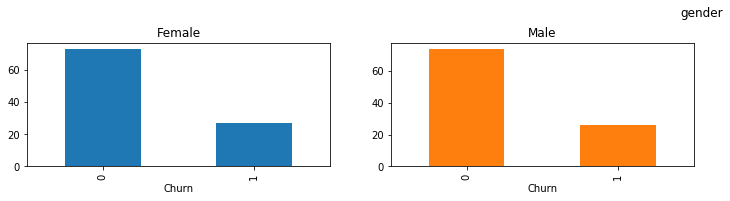

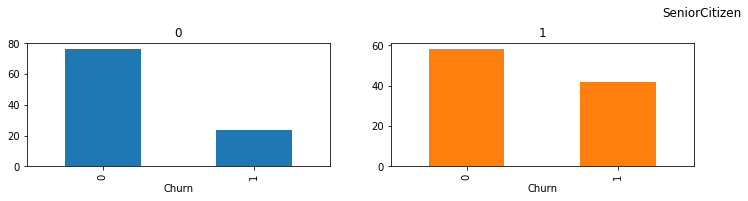

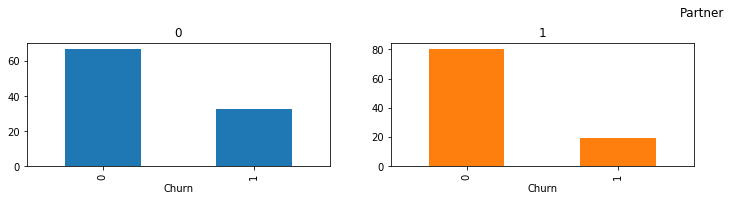

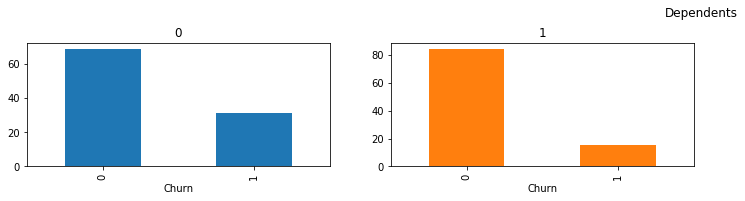

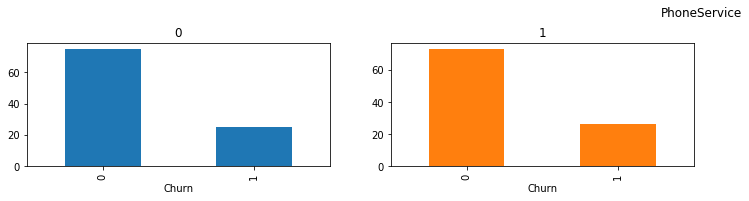

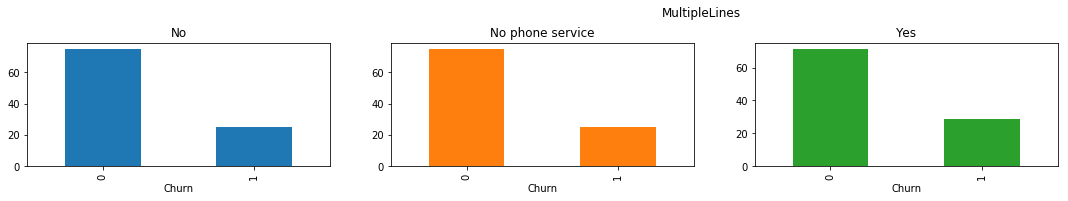

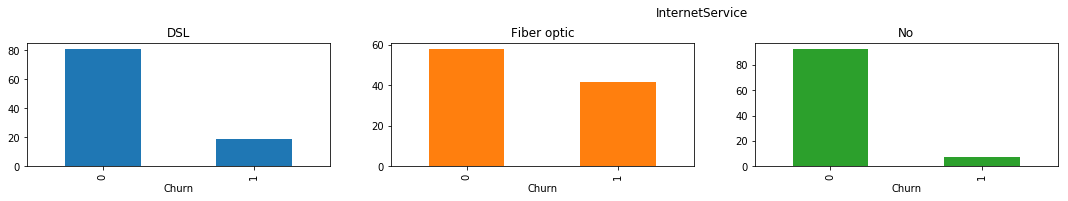

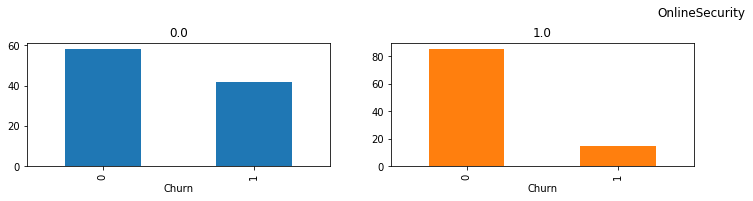

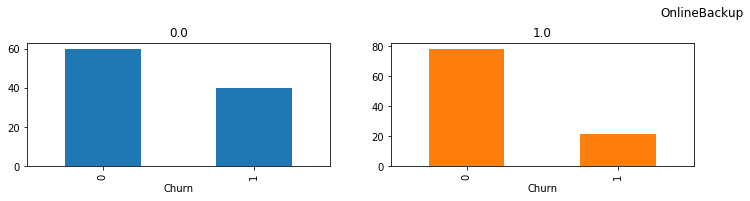

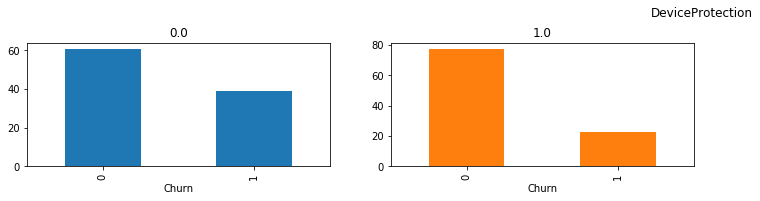

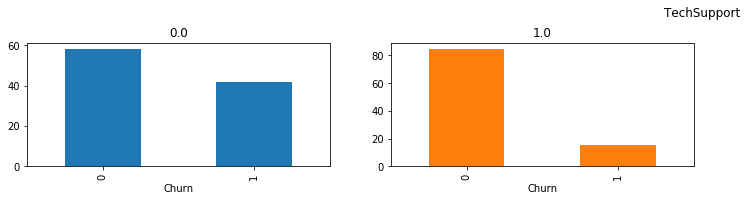

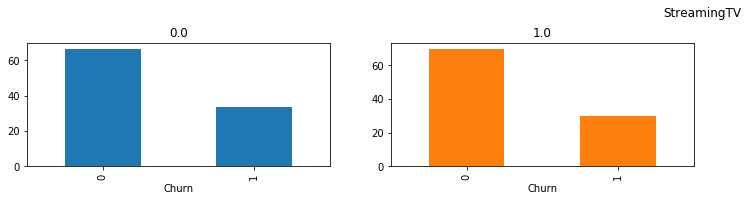

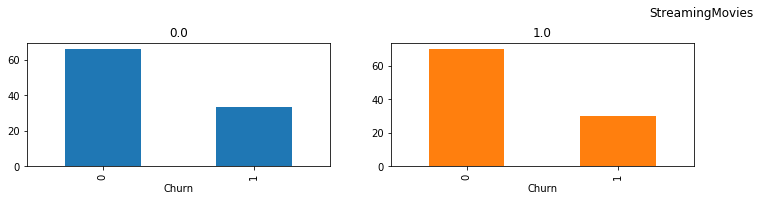

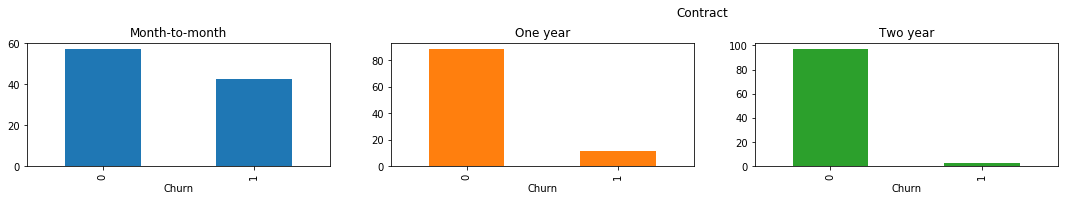

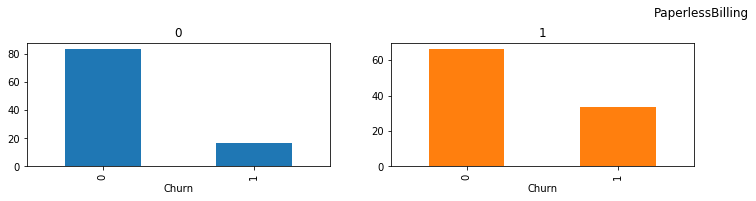

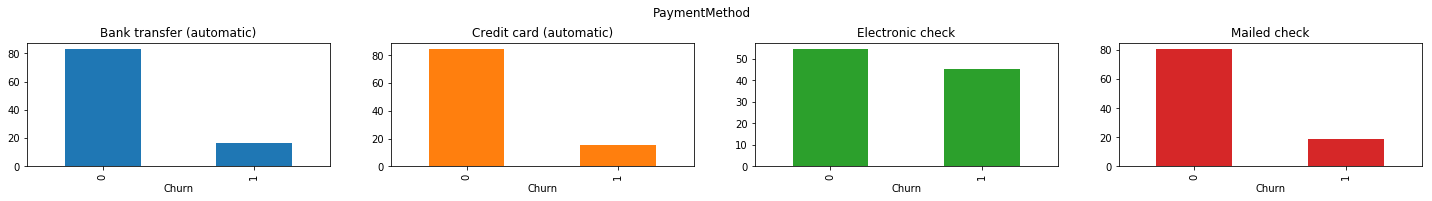

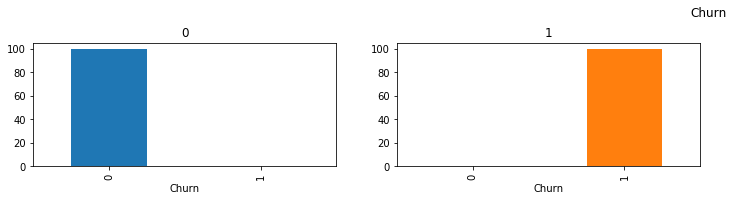

In [124]:
for i in chur:
    i.unstack(level=0).plot(kind='bar'
                            , subplots=True
                            , legend=False
                            , title=i.unstack(level=0).columns.name
                            , layout= (2,4)
                            , figsize= (25,5)
                           )

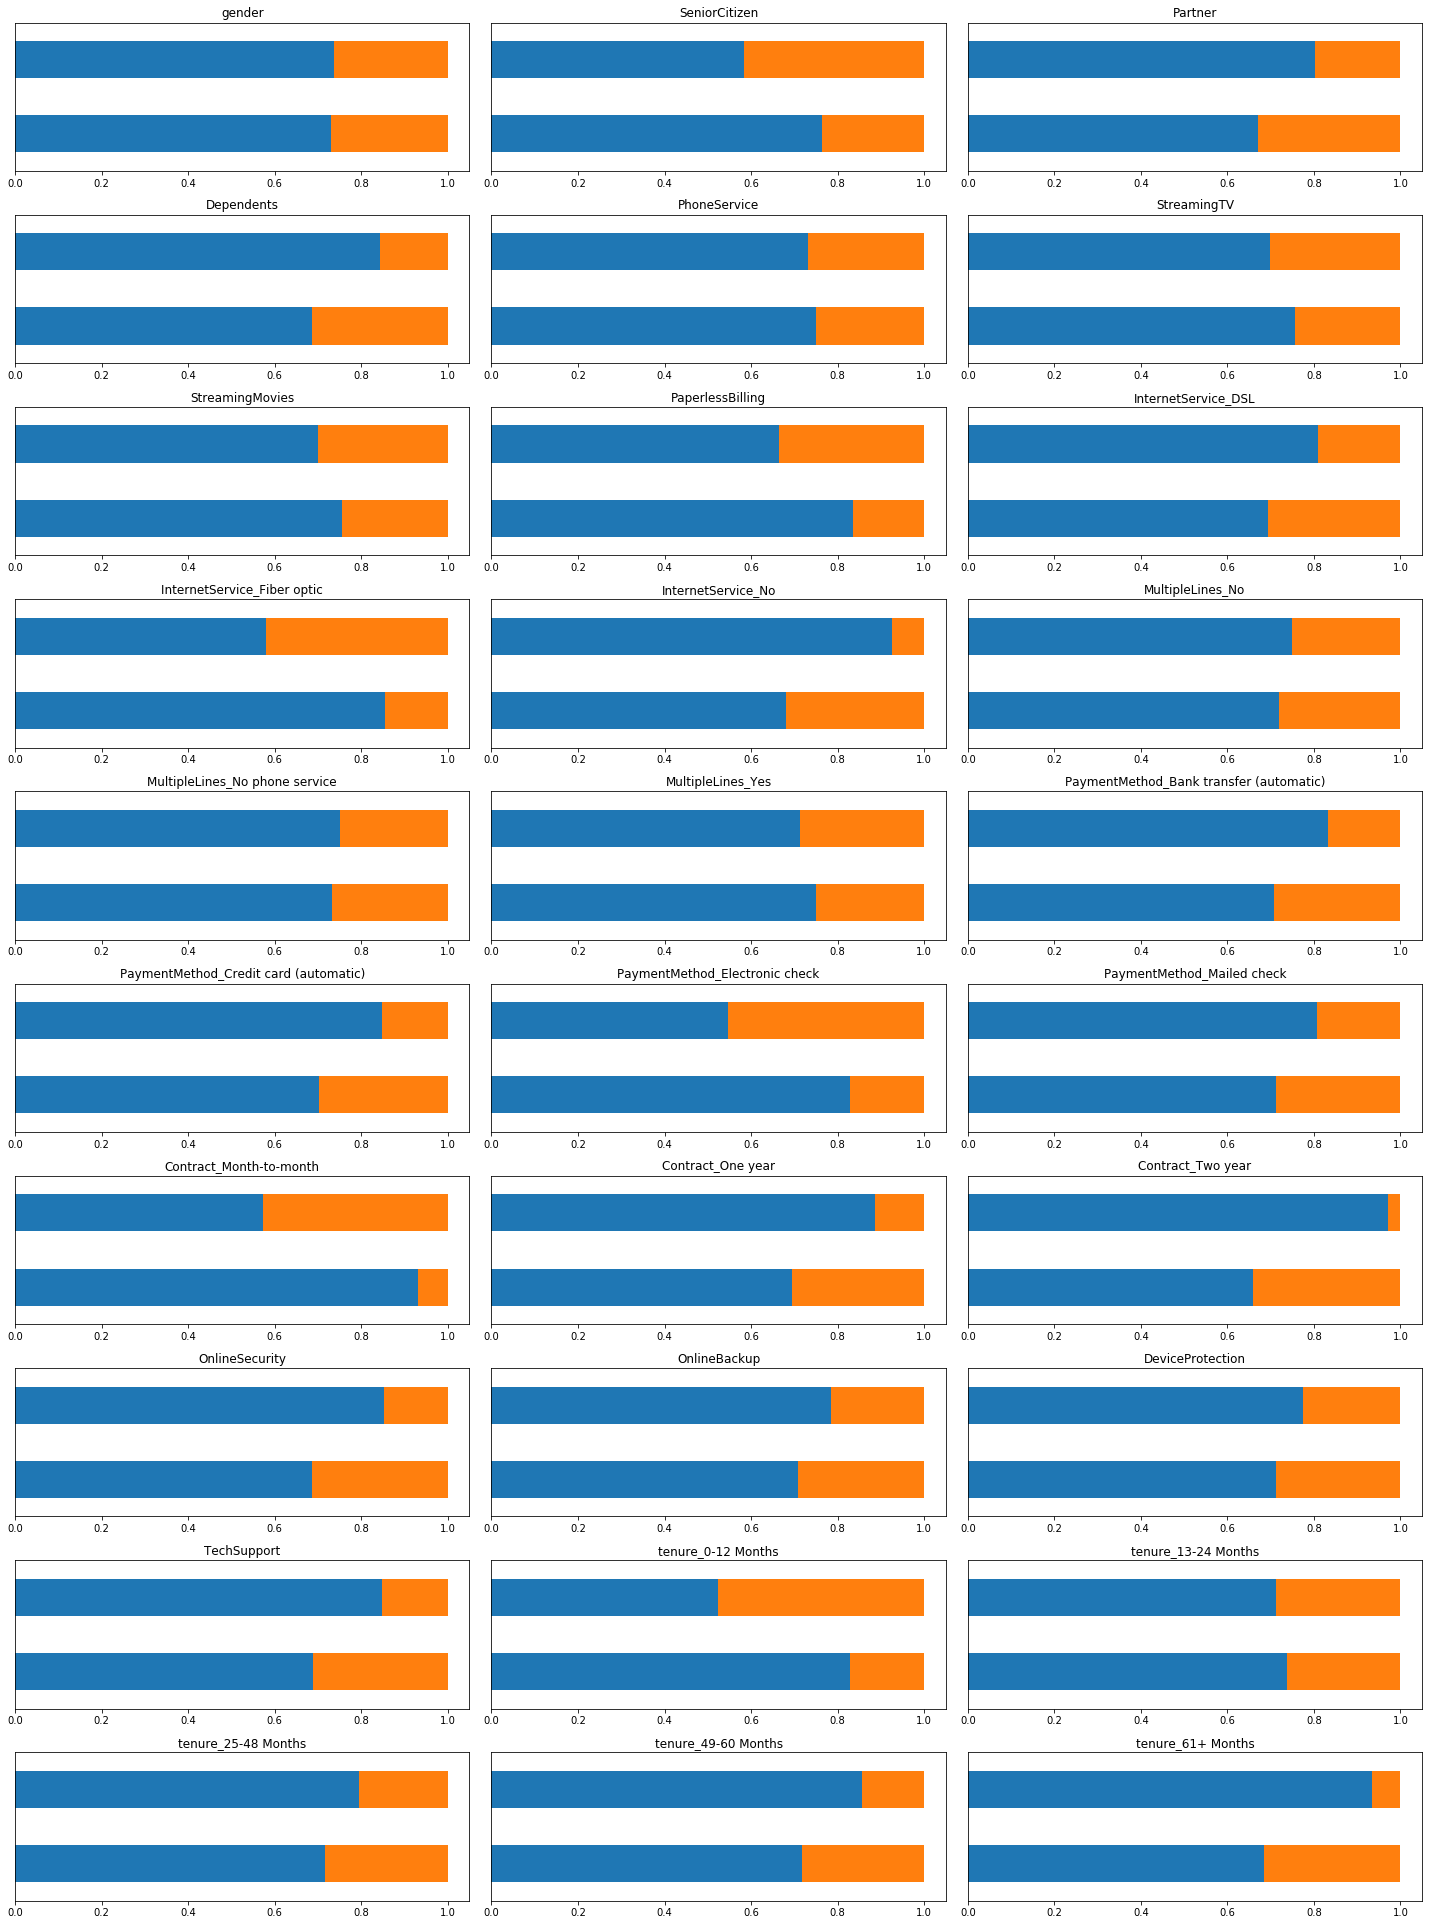

In [255]:
fig= plt.figure(figsize=(20,80))
i=1
for col_name in df1.drop(['MonthlyCharges','TotalCharges','Churn'],axis=1).columns:
    ax = fig.add_subplot(30,3,i)
    table=pd.crosstab(df1[col_name], df1['Churn'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax, legend=False)
    plt.title(col_name)
    plt.subplots_adjust(bottom=0.15)
    i+=1
    ax.axes.get_yaxis().set_visible(False)

plt.tight_layout()
